In [89]:
import os
import numpy as np
import matplotlib.pyplot as plt
import utils

data_path = '../data/gaussian.csv'
log_path = '../results/'

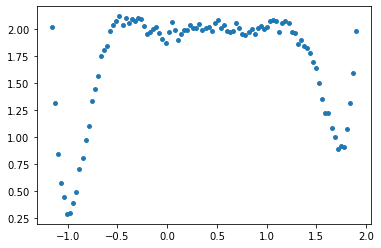

In [90]:
# Data Visualisation
f = open(data_path, 'r')
input_x, target = [], []
for line in f.readlines():
    nums = line.strip().split(',')
    input_x.append(float(nums[0]))
    target.append(float(nums[1]))
f.close()
plt.scatter(input_x, target, s=15)
plt.show()

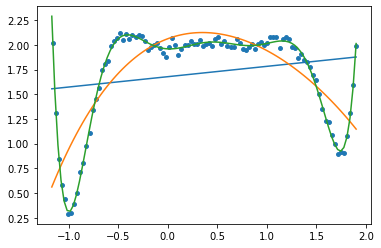

In [91]:
# Polynomial plots
deg_file = 'polynomial_deg.txt'
x, y = np.linspace(-1.17, 1.9, 100), []
f = open(os.path.join(log_path, deg_file), 'r')

for line in f.readlines():
    y_out = utils.get_output_from_weights(x, line.strip().split()[3])
    y.append(y_out)
    
y = [y[1], y[4], y[9]]
for y_out in y:
    plt.plot(x, y_out)
plt.scatter(input_x, target, s=15)
plt.show()


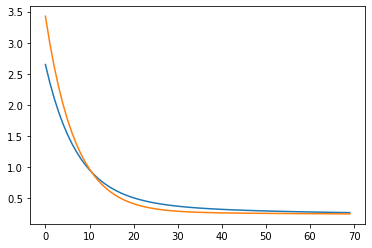

In [92]:
# For Gradient Descent
grad_file = 'grad_descent.txt'

train_loss, test_loss = [], []
f = open(os.path.join(log_path, grad_file), 'r')

for line in f.readlines():
    tokens = line.strip().split()
    if tokens[2] == "Train":
        train_loss.append(float(tokens[4]))
        test_loss.append(float(tokens[8]))

plt.plot(train_loss[:70])
plt.plot(test_loss[:70])
plt.show()